<a href="https://colab.research.google.com/github/Jorge2018/DataScience2022-2/blob/main/Script_redNeuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
# Imports
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.pipeline import make_pipeline


In [69]:
# Get data

url = "https://github.com/Jorge2018/RepositorioArchivos/blob/main/heart.xlsx?raw=true"

response = requests.get(url)

dest = 'local-file.xlsx'

with open(dest, 'wb') as file:
    file.write(response.content)

df = pd.read_excel(dest)


df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Exploracion de datos


    

In [70]:
df.duplicated()
df = df.drop_duplicates()
print('la cantidad de registros sin duplicados es:\n',df.count())
print('---------------------------')
print('los datos faltantes del df son:\n',df.isna().sum())
print('---------------------------')
print('los tipos de datos son:\n')
df.info()
print('---------------------------')
df.describe().round(3)

la cantidad de registros sin duplicados es:
 Age               918
Sex               918
ChestPainType     918
RestingBP         918
Cholesterol       918
FastingBS         918
RestingECG        918
MaxHR             918
ExerciseAngina    918
Oldpeak           918
ST_Slope          918
HeartDisease      918
dtype: int64
---------------------------
los datos faltantes del df son:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
---------------------------
los tipos de datos son:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 n

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000,918.000,918.000,918.000,918.000,918.000,918.000
mean,53.511,132.397,198.800,0.233,136.809,0.887,0.553
std,9.433,18.514,109.384,0.423,25.460,1.067,0.497
min,28.000,0.000,0.000,0.000,60.000,-2.600,0.000
25%,47.000,120.000,173.250,0.000,120.000,0.000,0.000
50%,54.000,130.000,223.000,0.000,138.000,0.600,1.000
75%,60.000,140.000,267.000,0.000,156.000,1.500,1.000
max,77.000,200.000,603.000,1.000,202.000,6.200,1.000


# Separa col objetivo

In [71]:
# Save X data
X = df.drop(columns = 'HeartDisease')
# Encode our target
y = df['HeartDisease']
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)



# Proceso para realizar transformaciones en los datos


In [72]:
## **Instanciar selectores**
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

## Instanciar transformadores SimpleImputer, StandardScaler y OneHotEncoder
# Imputers
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

## **Instanciar el pipeline**
numeric_pipe = make_pipeline(mean_imputer, scaler)
categorical_pipe = make_pipeline(freq_imputer, ohe)

## **Asignacion de tupla e instanciacion de ColumnTransformer**
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)

## **Transformacion de datos**
# fit on train
preprocessor.fit(X_train)
# transform train and test
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

*Revision de resultados transformacion*

In [73]:
print(np.isnan(X_train).sum().sum(), 'valores perdidos en la data de entrenamiento')
print(np.isnan(X_test).sum().sum(), 'valores perdidos en la data de prueba')
print('\n')
print('Todos los datos procesados del X_train son del tipo:', X_train.dtype)
print('Todos los datos procesados del X_test son del tipo', X_test.dtype)
print('\n')
print('shape de los datos de entrenamiento son', X_train.shape)
print('\n')
print('shape de los datos de test son', X_test.shape)

0 valores perdidos en la data de entrenamiento
0 valores perdidos en la data de prueba


Todos los datos procesados del X_train son del tipo: float64
Todos los datos procesados del X_test son del tipo float64


shape de los datos de entrenamiento son (688, 20)


shape de los datos de test son (230, 20)



*Definicion de la estructura de red*

In [74]:
# Step 1: Define our network structure
# Save the number of features we have as our input shape
input_shape = X_train.shape[1]
print('la cantidad de caracteristicas (cols) es:',input_shape)


la cantidad de caracteristicas (cols) es: 20


*Modelo sequencial*

In [75]:
# Sequential model
model = Sequential()


*Agregacion de capas ocultas (2), numero de neuronas (19,10) y capa de salida*

In [76]:
# First hidden layer
model.add(Dense(19, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
# Second hidden layer
model.add(Dense(10, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?

# Output layer
model.add(Dense(1, activation = 'sigmoid'))



*Compilamiento del modelo con optomizador adam*

In [77]:
# Step 2: Compile
model.compile(loss = 'bce', optimizer = 'adam')

*Ajuste del modelo*

In [78]:
# Step 3: Fit our model
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=10)



Epoch 1/10
22/22 [==============================] - 1s 9ms/step - loss: 0.7604 - val_loss: 0.6823
Epoch 2/10
22/22 [==============================] - 0s 4ms/step - loss: 0.6602 - val_loss: 0.6045
Epoch 3/10
22/22 [==============================] - 0s 3ms/step - loss: 0.5981 - val_loss: 0.5407
Epoch 4/10
22/22 [==============================] - 0s 3ms/step - loss: 0.5463 - val_loss: 0.4815
Epoch 5/10
22/22 [==============================] - 0s 3ms/step - loss: 0.5001 - val_loss: 0.4300
Epoch 6/10
22/22 [==============================] - 0s 3ms/step - loss: 0.4595 - val_loss: 0.3857
Epoch 7/10
22/22 [==============================] - 0s 3ms/step - loss: 0.4279 - val_loss: 0.3497
Epoch 8/10
22/22 [==============================] - 0s 3ms/step - loss: 0.4045 - val_loss: 0.3243
Epoch 9/10
22/22 [==============================] - 0s 4ms/step - loss: 0.3869 - val_loss: 0.3077
Epoch 10/10
22/22 [==============================] - 0s 3ms/step - loss: 0.3741 - val_loss: 0.2954


*visualizacion de datos perdidos*

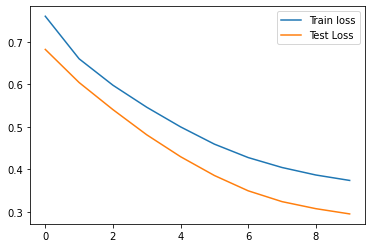

In [79]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();



*Podemos observar que a medida que aumentamos el número de épocas para que el entrenamos nuestro modelo, tanto la pérdida de entrenamiento como la de validación disminuya. Esto es exactamente lo que queremos, ya que queremos que la pérdida sea lo más bajo posible. En la realidad, queremos ejecutar nuestro modelo para más de 10 épocas.*

*Agregacion de capas ocultas (2), numero de neuronas (9,5) y capa de salida*

In [82]:
# First hidden layer
model.add(Dense(9, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
# Second hidden layer
model.add(Dense(5, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?

# Output layer
model.add(Dense(1, activation = 'sigmoid'))

*Compilamiento del modelo con optomizador adam*

In [83]:
model.compile(loss = 'bce', optimizer = 'adam')

*Ajuste del modelo*

In [84]:
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=10)

Epoch 1/10
22/22 [==============================] - 1s 11ms/step - loss: 0.6948 - val_loss: 0.6925
Epoch 2/10
22/22 [==============================] - 0s 3ms/step - loss: 0.6919 - val_loss: 0.6906
Epoch 3/10
22/22 [==============================] - 0s 4ms/step - loss: 0.6886 - val_loss: 0.6859
Epoch 4/10
22/22 [==============================] - 0s 3ms/step - loss: 0.6847 - val_loss: 0.6811
Epoch 5/10
22/22 [==============================] - 0s 4ms/step - loss: 0.6803 - val_loss: 0.6757
Epoch 6/10
22/22 [==============================] - 0s 3ms/step - loss: 0.6750 - val_loss: 0.6695
Epoch 7/10
22/22 [==============================] - 0s 3ms/step - loss: 0.6690 - val_loss: 0.6624
Epoch 8/10
22/22 [==============================] - 0s 4ms/step - loss: 0.6622 - val_loss: 0.6542
Epoch 9/10
22/22 [==============================] - 0s 4ms/step - loss: 0.6545 - val_loss: 0.6449
Epoch 10/10
22/22 [==============================] - 0s 4ms/step - loss: 0.6457 - val_loss: 0.6350


*visualizacion de datos perdidos*

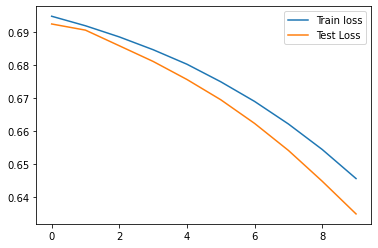

In [85]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

*Agregacion de capas ocultas (3), numero de neuronas (15,10,5) y capa de salida*

In [87]:
# First hidden layer
model.add(Dense(15, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?

# Second hidden layer
model.add(Dense(10, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?

# Second hidden layer
model.add(Dense(5, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?

# Output layer
model.add(Dense(1, activation = 'sigmoid'))

*Compilamiento del modelo con optomizador adam*

In [88]:
model.compile(loss = 'bce', optimizer = 'adam')

*Ajuste del modelo*

In [89]:
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=10)

Epoch 1/10
22/22 [==============================] - 2s 30ms/step - loss: 0.6908 - val_loss: 0.6895
Epoch 2/10
22/22 [==============================] - 0s 10ms/step - loss: 0.6874 - val_loss: 0.6866
Epoch 3/10
22/22 [==============================] - 0s 13ms/step - loss: 0.6841 - val_loss: 0.6840
Epoch 4/10
22/22 [==============================] - 0s 10ms/step - loss: 0.6817 - val_loss: 0.6812
Epoch 5/10
22/22 [==============================] - 0s 10ms/step - loss: 0.6785 - val_loss: 0.6769
Epoch 6/10
22/22 [==============================] - 0s 7ms/step - loss: 0.6732 - val_loss: 0.6695
Epoch 7/10
22/22 [==============================] - 0s 6ms/step - loss: 0.6636 - val_loss: 0.6545
Epoch 8/10
22/22 [==============================] - 0s 5ms/step - loss: 0.6423 - val_loss: 0.6194
Epoch 9/10
22/22 [==============================] - 0s 5ms/step - loss: 0.5938 - val_loss: 0.5438
Epoch 10/10
22/22 [==============================] - 0s 5ms/step - loss: 0.5177 - val_loss: 0.4585


*visualizacion de datos perdidos*

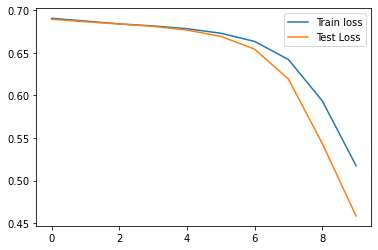

In [90]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();